In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mplt
import pylab as plt
from matplotlib import rc
from pylab import figure, show, legend, xlabel, ylabel
df=pd.read_csv("/home/vanemtzl/Actividad 7/CaboAbril.csv")

In [2]:
df.columns

Index(['Año', 'Mes', 'Día', 'Hora(utc)', 'Altura(mm)'], dtype='object')

In [3]:
from datetime import datetime
df['date']= df.apply(lambda x:datetime.strptime("{0} {1} {2} {3}".format(x[u'Año'],x[u'Mes'], x[u'Día'], x[u'Hora(utc)']), "%Y %m %d %H"),axis=1)

In [4]:
df.apply(lambda x: sum(x.isnull()), axis=0)

Año           0
Mes           0
Día           0
Hora(utc)     0
Altura(mm)    0
date          0
dtype: int64

In [5]:
df.tail()

,Año,Mes,Día,Hora(utc),Altura(mm),date
715,2016,4,30,19,297,2016-04-30 19:00:00
716,2016,4,30,20,409,2016-04-30 20:00:00
717,2016,4,30,21,524,2016-04-30 21:00:00
718,2016,4,30,22,624,2016-04-30 22:00:00
719,2016,4,30,23,692,2016-04-30 23:00:00


In [8]:
v = np.arange(0.0, 744.0, 1.0)

In [9]:
df['T'] =  pd.Series(v, index =None)

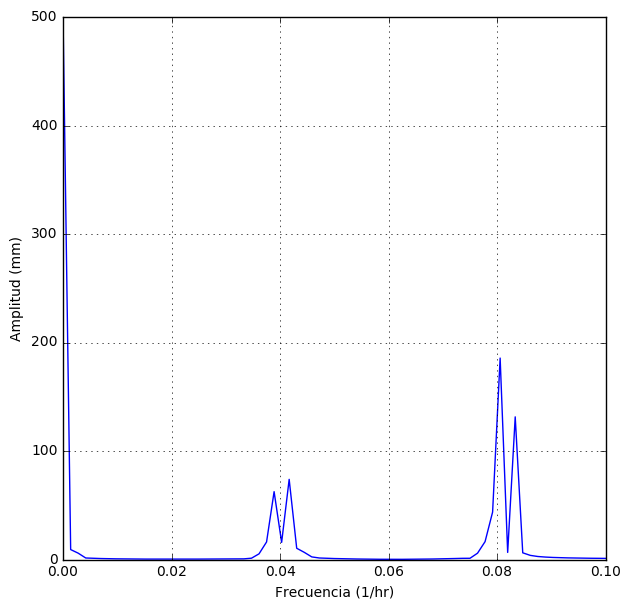

In [7]:
from scipy.fftpack import fft, fftfreq, fftshift
# number of signal points
N = 720
# sample spacing
T = 1
x = df['date']
y = df['Altura(mm)']
yf = fft(y)
xf = fftfreq(N, T)
xf = fftshift(xf)
yplot = fftshift(yf)
import matplotlib.pyplot as plt
plt.plot(xf, 1.0/N * np.abs(yplot))
plt.xlim(0, 0.1)
fig=plt.gcf()
fig.set_size_inches(7,7)

plt.xlabel("Frecuencia (1/hr)")
plt.ylabel("Amplitud (mm)")

plt.grid()
plt.show()

In [10]:
a = 2*np.absolute(yf)/N

In [13]:
#Esto me proporciona los picos de la gráfica de la transformada de Furier
print(np.where(a[:,]>50))
b= a[a[:,]>50]
b

(array([  0,  28,  30,  57,  58,  60, 660, 662, 663, 690, 692]),)


array([ 988.49722222,  125.06328085,  147.72498487,   87.42469109,
        371.28785503,  262.93800064,  262.93800064,  371.28785503,
         87.42469109,  147.72498487,  125.06328085])

In [20]:
#Amplitudes, frecuencias, fases, de los picos

#Amplitud
A0 = np.absolute(yf[int(0),]/N)
A1= 2*np.absolute(yf[28,]/N)
A2= 2*np.absolute(yf[30,]/N)
A3= 2*np.absolute(yf[57,]/N)
A4= 2*np.absolute(yf[58,]/N)
A5= 2*np.absolute(yf[60,]/N)

#Frecuencia
f1= xf[int(N/2 +28),]
f2= xf[int(N/2 +30),]
f3= xf[int(N/2 +57),]
f4= xf[int(N/2 +58),]
f5= xf[int(N/2 +60),]

#Fases
O1= np.angle(yf[28,])
O2= np.angle(yf[30,])
O3= np.angle(yf[57,])
O4= np.angle(yf[58,])
O5= np.angle(yf[60,])

In [21]:
y= df['Altura(mm)']/1000
w= 2.0*np.pi
a=0
def f(t):
    return A0+ (A1*np.cos(w*f1*t+O1) + A2*np.cos(w*f2 *t+O2) 
                   + A3*np.cos(w*f3*t+O3) + A4*np.cos(w*f4*t + O4)
                   + A5*np.cos(w*f5*t+O5))

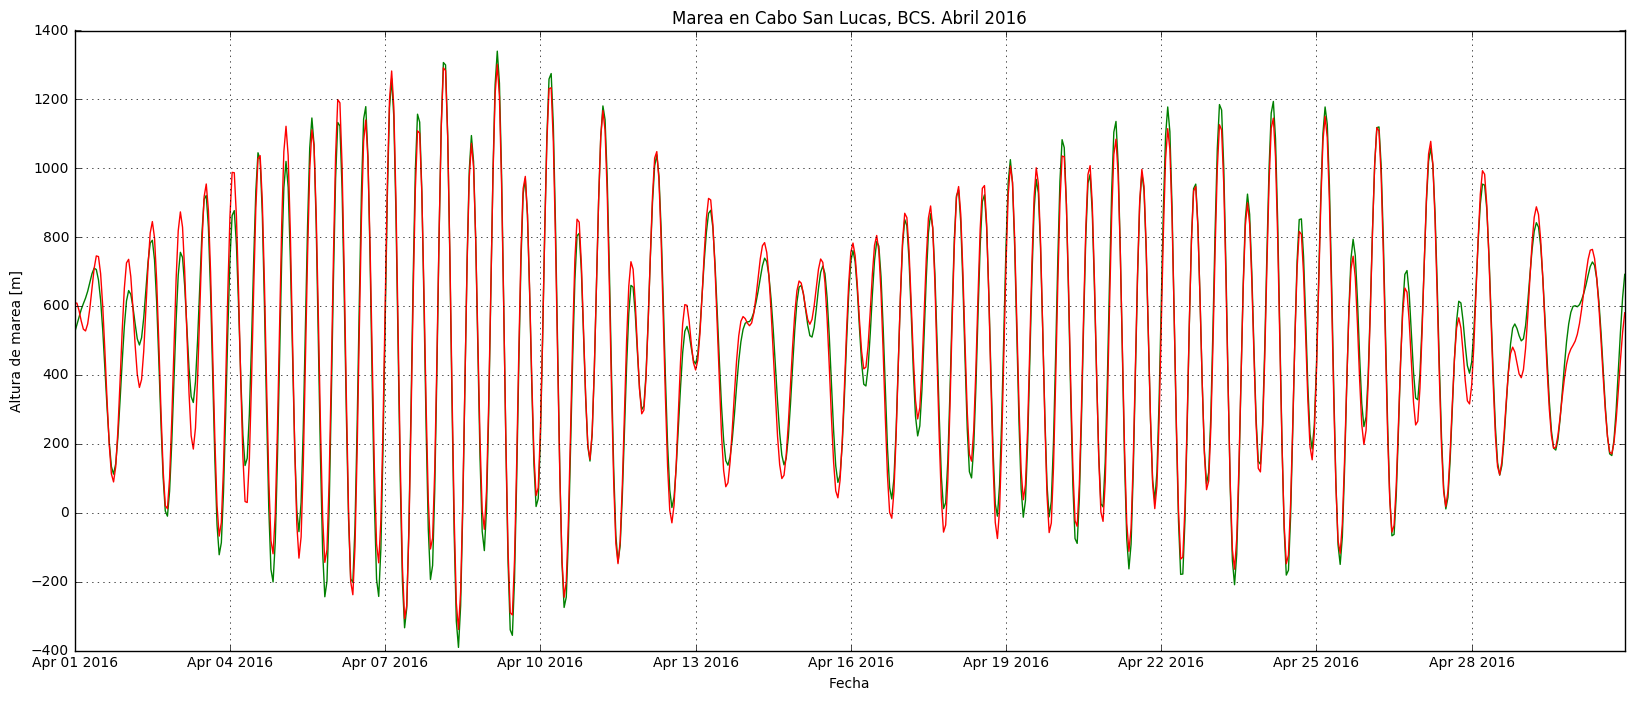

In [28]:
plt.plot(df[u'date'], y, 'g', label ="Altura")
plt.plot(df['date'], f(df['T']), 'r-', label='Altura reconstruida')
plt.ylabel('Altura de marea [m]')
plt.xlabel('Fecha')
plt.title('Marea en Cabo San Lucas, BCS. Abril 2016')
plt.grid(True)

fig = plt.gcf()
fig.set_size_inches(20, 8)
plt.show()

In [26]:
y=df['Altura(mm)']
y1=f(df['T'])

In [27]:
#Error relativo
print(sum(abs(y-y1)**2) / sum(abs(y)**2))

0.00692568746568
